[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1_UofaCHM_wmZDz5mvLUHdFMGGHzfMWwJ?usp=sharing)

<img src="https://cdn-icons-png.flaticon.com/512/564/564619.png" alt="Icona" width="32" height="32">

**For this lesson, the GPU is required.**
Go to Runtime > Change runtime type > Hardware accelerator > GPU > GPU type > T4.



**For this lesson, you need a Google AI Studio API key.**

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Google_Gemini_logo.svg" alt="Icona" width="344" height="127">

Then, press the key button on the left side bar and add "GOOGLE_API_KEY"

[LINK](https://aistudio.google.com/app/prompts/new_chat)



**For this lesson, you need a Groq API key.**

<img src="https://www.ciscoinvestments.com/assets/logos/groq-logo.png" alt="Icona" width="320" height="117">

Then, press the key button on the left side bar and add "GROQ_API_KEY"

[LINK](https://console.groq.com/playground)



**For this lesson, you need a Mistral API key.**

<img src="https://upload.wikimedia.org/wikipedia/en/1/1f/LowRes_80dpi_Mistral_AI_Logo.png" alt="Icona" width="324" height="107">

Then, press the key button on the left side bar and add "MISTRAL_API_KEY"

[LINK](https://mistral.ai/)


In [1]:
%pip install python-dotenv
%pip install langchain
%pip install langchain-community
%pip install langchain-core

In [2]:
%pip install -qU langchain-groq
%pip install -qU langchain_mistralai
%pip install -qU langchain-google-genai pillow

### FIRST STEP: SET YOUR API-KEYS

In [3]:
from google.colab import userdata
import getpass
import os

# Groq API Key
if "GROQ_API_KEY" not in os.environ:
    try:
        os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')
    except Exception as e:
        os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

# Google API Key
if "GOOGLE_API_KEY" not in os.environ:
    try:
        os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
    except Exception as e:
        os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key: ")

# Mistral API Key
if "MISTRAL_API_KEY" not in os.environ:
    try:
        os.environ["MISTRAL_API_KEY"] = userdata.get('MISTRAL_API_KEY')
    except Exception as e:
        os.environ["MISTRAL_API_KEY"] = getpass.getpass("Provide your Mistral API Key: ")

### Utils - just for visualization

In [4]:
%pip install -qU rich

In [5]:
from rich.console import Console
from rich.panel import Panel
from rich.text import Text
from rich.syntax import Syntax
from rich.table import Table
from typing import Any

console = Console()
def print_model_response(input_text: str, model_response: Any, model_name: str = "assistant") -> None:

    # Input Panel
    input_panel = Panel(
        Text(input_text, style="blue"), title="📝 Input Text", border_style="blue"
    )

    # Response Panel
    if isinstance(model_response, dict):
        table = Table(show_header=True, header_style="bold magenta")
        table.add_column("Key", style="cyan")
        table.add_column("Value", style="yellow")

        for key, value in model_response.items():
            table.add_row(str(key), str(value))

        response_content = table
    else:
        response_content = Text(str(model_response), style="yellow")

    response_panel = Panel(
        response_content, title=model_name+"🤖 Response", border_style="magenta"
    )

    console.print("\n" + "=" * 80 + "\n")
    console.print(input_panel)
    console.print(response_panel)
    console.print("\n" + "=" * 80 + "\n")


### Call the models

In [6]:
prompt = "Tell a joke about BERT and RoBERTA"
messages = [
    ("human", prompt)
]

In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_groq import ChatGroq
from langchain_mistralai import ChatMistralAI

llm_Gemini = ChatGoogleGenerativeAI(model="gemini-1.5-pro", temperature=0)
#result_Gemini = llm_Gemini.invoke(messages)
llm_Groq = ChatGroq(model="llama-3.1-8b-instant", temperature=0)
resultGroq = llm_Groq.invoke(messages)
llm_Mistral = ChatMistralAI(model="ministral-8b-latest", temperature=0)
resultMistral = llm_Mistral.invoke(messages)
#print_model_response(prompt, result_Gemini.content, "gemini-1.5-pro")
print_model_response(prompt, resultGroq.content, "LLama3.1")
print_model_response(prompt, resultMistral.content, "ministral-8b-latest")




================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ Tell a joke about BERT and RoBERTA                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── LLama3.1🤖 Response ──────────────────────────────────────────────╮
│ Why did BERT and RoBERTA go to therapy?                                                                         │
│                                                                                                                 │
│ Because BERT was feeling a little "pre-trained" for stress, and RoBERTA was struggling to "fine-tune" her       │
│ emotions.                                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ Tell a joke about BERT and RoBERTA                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── ministral-8b-latest🤖 Response ─────────────────────────────────────────╮
│ What do you call it when BERT and RoBERTA go on a date?                                                         │
│                                                                                                                 │
│ BERT-ing and RoBERTA-ing!                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

In [8]:
from typing import List
def zero_shot_classify(text: str, categories: List[str], llm) -> str:
    """
    Simple zero-shot classification using any LLM.

    Args:
        text: input text to classify
        categories: list of possible categories
        llm: initialized LLM instance
    """
    prompt = f"""
    Classify the following text into one of these categories: {', '.join(categories)}

    Text: {text}
    Classification:"""

    response = llm.invoke(prompt)
    print_model_response(prompt, response.content)
    return response.content

In [9]:
zero_shot_classify("I hate the world", ["happy","sad"], llm_Groq)

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│                                                                                                                 │
│     Classify the following text into one of these categories: happy, sad                                        │
│                                                                                                                 │
│     Text: I hate the world                                                                                      │
│     Classification:                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ Classification: sad                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

'Classification: sad'

In [10]:
def few_shot_classify(text: str, examples: List[dict], task: str, llm) -> str:
    """
    Few-shot learning with examples.

    Args:
        text: input text to process
        examples: list of {"input": str, "output": str} dictionaries
        task: description of the task
        llm: initialized LLM instance
    """
    prompt = f"Task: {task}\n\nExamples:\n"
    for example in examples:
        prompt += f"\nInput: {example['input']}\nOutput: {example['output']}\n"
    prompt += f"\nInput: {text}\nOutput:"

    response = llm.invoke(prompt)
    print_model_response(prompt, response.content)
    return response.content

In [11]:
examples = [
    {
        "input": "This movie was absolutely fantastic!",
        "output": "happy"
    },
    {
        "input": "I lost my wallet today",
        "output": "sad"
    }
]

r = few_shot_classify(
    text="I hate the world",
    examples=examples,
    task="Classify the sentiment as either 'happy' or 'sad'",
    llm=llm_Groq
)

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ Task: Classify the sentiment as either 'happy' or 'sad'                                                         │
│                                                                                                                 │
│ Examples:                                                                                                       │
│                                                                                                                 │
│ Input: This movie was absolutely fantastic!                                                                     │
│ Output: happy                                                                                                   │
│                                                                                                                 │
│ Input: I lost my wallet today                                                                                   │
│ Output: sad                                                                                                     │
│                                                                                                                 │
│ Input: I hate the world                                                                                         │
│ Output:                                                                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ I hate the world                                                                                                │
│ Output: sad                                                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

In [12]:
def chain_of_thought(question: str, llm) -> str:
    """
    Chain-of-thought prompting for step-by-step reasoning.

    Args:
        question: input question or problem
        llm: initialized LLM instance
    """
    prompt = f"""
    Please solve this problem step by step:

    Question: {question}

    Let's approach this step by step:
    """

    response = llm.invoke(prompt)
    print_model_response(prompt, response.content)
    return response.content

In [13]:
llm_Gemma_dumb = ChatGroq(model="gemma2-9b-it", temperature=0)


In [14]:
riddle = """Which number is larger, 3.9 or 3.11?"""
print_model_response(riddle,llm_Gemma_dumb.invoke(riddle).content)

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ Which number is larger, 3.9 or 3.11?                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ 3.11 is larger than 3.9.                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

In [15]:
# Chain of thought example
chain_of_thought(
    question=riddle,
    llm=llm_Gemma_dumb
)

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│                                                                                                                 │
│     Please solve this problem step by step:                                                                     │
│                                                                                                                 │
│     Question: Which number is larger, 3.9 or 3.11?                                                              │
│                                                                                                                 │
│     Let's approach this step by step:                                                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ Here's how to solve the problem step-by-step:                                                                   │
│                                                                                                                 │
│ **1. Compare the whole number parts:**                                                                          │
│                                                                                                                 │
│ * Both numbers have a "3" in the whole number part.                                                             │
│                                                                                                                 │
│ **2. Compare the tenths place:**                                                                                │
│                                                                                                                 │
│ * 3.9 has a "9" in the tenths place.                                                                            │
│ * 3.11 has a "1" in the tenths place.                                                                           │
│ * Since 9 is greater than 1, 3.9 is larger than 3.11 in this part.                                              │
│                                                                                                                 │
│ **3.  Consider the hundredths place (if necessary):**                                                           │
│                                                                                                                 │
│ *  We don't need to compare the hundredths place because the tenths place already tells us 3.9 is larger.       │
│                                                                                                                 │
│                                                                                                                 │
│ **Conclusion:**                                                                                                 │
│                                                                                                                 │
│ 3.9 is larger than 3.11.                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

'Here\'s how to solve the problem step-by-step:\n\n**1. Compare the whole number parts:**\n\n* Both numbers have a "3" in the whole number part.\n\n**2. Compare the tenths place:**\n\n* 3.9 has a "9" in the tenths place.\n* 3.11 has a "1" in the tenths place. \n* Since 9 is greater than 1, 3.9 is larger than 3.11 in this part.\n\n**3.  Consider the hundredths place (if necessary):**\n\n*  We don\'t need to compare the hundredths place because the tenths place already tells us 3.9 is larger.\n\n\n**Conclusion:**\n\n3.9 is larger than 3.11. \n'

## Adding Memory

In [16]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
# Inizializza la memoria
memory = ConversationBufferMemory()
# Crea una catena conversazionale con memoria
groq_chain = ConversationChain(
    llm=llm_Groq,
    memory=memory,
)
# Primo input
text = "Ciao, sono Luigi"
response = groq_chain.invoke(text)
print_model_response(text, response["response"])


<ipython-input-16-46a16f9fbb9a>:4: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()
<ipython-input-16-46a16f9fbb9a>:6: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  groq_chain = ConversationChain(


================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ Ciao, sono Luigi                                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ Ciao Luigi! Sono felice di conoscerti. Sembra che tu sia un appassionato di Mario, giusto? Ho notato che il tuo │
│ nome è Luigi, il fratello di Mario, il famoso personaggio dei videogiochi della Nintendo. Sono pronto a         │
│ discutere di tutto, dai mondi di Super Mario Bros. ai segreti di New Donk City. Cosa ti piacerebbe discutere    │
│ oggi?                                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

In [17]:
text2 = "Come mi chiamo?"
response = groq_chain.invoke(text2)
print_model_response(text2, response["response"])

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ Come mi chiamo?                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ Ahah, Luigi! Il tuo nome è già una grande indicazione della tua passione per i videogiochi della Nintendo. Il   │
│ tuo nome è Luigi, il fratello maggiore di Mario, il famoso personaggio dei videogiochi della Nintendo. Sembra   │
│ che tu sia un grande fan della serie Super Mario Bros. e dei suoi mondi fantastici. Sei pronto a esplorare i    │
│ mondi di Super Mario World, di Super Mario 64 o forse di New Super Mario Bros. U?                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

In [18]:
# prompt: Let us investigate how the memory looks like

print_model_response("",memory.buffer)

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ Human: Ciao, sono Luigi                                                                                         │
│ AI: Ciao Luigi! Sono felice di conoscerti. Sembra che tu sia un appassionato di Mario, giusto? Ho notato che il │
│ tuo nome è Luigi, il fratello di Mario, il famoso personaggio dei videogiochi della Nintendo. Sono pronto a     │
│ discutere di tutto, dai mondi di Super Mario Bros. ai segreti di New Donk City. Cosa ti piacerebbe discutere    │
│ oggi?                                                                                                           │
│ Human: Come mi chiamo?                                                                                          │
│ AI: Ahah, Luigi! Il tuo nome è già una grande indicazione della tua passione per i videogiochi della Nintendo.  │
│ Il tuo nome è Luigi, il fratello maggiore di Mario, il famoso personaggio dei videogiochi della Nintendo.       │
│ Sembra che tu sia un grande fan della serie Super Mario Bros. e dei suoi mondi fantastici. Sei pronto a         │
│ esplorare i mondi di Super Mario World, di Super Mario 64 o forse di New Super Mario Bros. U?                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

### Sentiment Analysis pt3

In [19]:
%pip install transformers==4.48.0 datasets accelerate==0.31.0 torch

In [20]:
from transformers import pipeline
from langchain_groq import ChatGroq
from datasets import load_dataset
import random
import json

In [21]:
def get_balanced_sample(dataset, n_samples=15):
    pos_samples = [{'text': x['text'], 'label': x['label']}
                  for x in dataset if x['label'] == 1]
    neg_samples = [{'text': x['text'], 'label': x['label']}
                  for x in dataset if x['label'] == 0]

    n_pos = n_samples // 2
    n_neg = n_samples - n_pos

    sampled_pos = random.sample(pos_samples, n_pos)
    sampled_neg = random.sample(neg_samples, n_neg)

    samples = sampled_pos + sampled_neg
    random.shuffle(samples)
    return samples

In [22]:
def analyze_with_roberta(texts, sentiment_pipeline):
    results = []
    for text in texts:
        # Get raw sentiment scores
        analysis = sentiment_pipeline(text)
        # RoBERTa returns a list with one dictionary containing 'label' and 'score'
        prediction = 1 if analysis[0]['label'] == 'POSITIVE' else 0
        results.append(prediction)
    return results

In [23]:
def analyze_with_llama(texts, llm):
    results = []
    prompt_template = """Classify the sentiment of the following movie review as either positive (1) or negative (0). Respond with ONLY the number.

Review: "{text}"
Classification:"""

    for text in texts:
        prompt = prompt_template.format(text=text)
        try:
            response = llm.invoke(prompt)
            prediction = int(response.content.strip())
            results.append(prediction)
        except:
            print(f"Error with text: {text[:50]}...")
            results.append(0)  # Default to negative on error
    return results

In [24]:
random.seed(42)
# Load dataset
dataset = load_dataset("rotten_tomatoes")
test_data = dataset["test"]
# Get balanced sample
samples = get_balanced_sample(test_data, n_samples=15)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [25]:
samples

[{'text': 'a grittily beautiful film that looks , sounds , and feels more like an extended , open-ended poem than a traditionally structured story .',
  'label': 1},
 {'text': 'a dreadful day in irish history is given passionate , if somewhat flawed , treatment .',
  'label': 1},
 {'text': 'the attempt to build up a pressure cooker of horrified awe emerges from the simple fact that the movie has virtually nothing to show .',
  'label': 0},
 {'text': "it's an odd show , pregnant with moods , stillborn except as a harsh conceptual exercise .",
  'label': 0},
 {'text': 'missteps take what was otherwise a fascinating , riveting story and send it down the path of the mundane .',
  'label': 1},
 {'text': 'noyce creates a film of near-hypnotic physical beauty even as he tells a story as horrifying as any in the heart-breakingly extensive annals of white-on-black racism .',
  'label': 1},
 {'text': 'hopelessly inane , humorless and under-inspired .', 'label': 0},
 {'text': 'director kevin bray

In [26]:
# Initialize models
roberta = pipeline("sentiment-analysis",
                  model="cardiffnlp/twitter-roberta-base-sentiment-latest",
                  tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest")

llm = ChatGroq(temperature=0,
                model="llama-3.1-8b-instant")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


In [27]:
#Get predictions
texts = [s['text'] for s in samples]
roberta_preds = analyze_with_roberta(texts, roberta)
llama_preds = analyze_with_llama(texts, llm)

# Format results
results = []
for i in range(len(samples)):
    results.append({
        'text': samples[i]['text'],
        'true_label': samples[i]['label'],
        'roberta_pred': roberta_preds[i],
        'llama_pred': llama_preds[i]
    })

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [28]:
results

[{'text': 'a grittily beautiful film that looks , sounds , and feels more like an extended , open-ended poem than a traditionally structured story .',
  'true_label': 1,
  'roberta_pred': 0,
  'llama_pred': 1},
 {'text': 'a dreadful day in irish history is given passionate , if somewhat flawed , treatment .',
  'true_label': 1,
  'roberta_pred': 0,
  'llama_pred': 0},
 {'text': 'the attempt to build up a pressure cooker of horrified awe emerges from the simple fact that the movie has virtually nothing to show .',
  'true_label': 0,
  'roberta_pred': 0,
  'llama_pred': 0},
 {'text': "it's an odd show , pregnant with moods , stillborn except as a harsh conceptual exercise .",
  'true_label': 0,
  'roberta_pred': 0,
  'llama_pred': 0},
 {'text': 'missteps take what was otherwise a fascinating , riveting story and send it down the path of the mundane .',
  'true_label': 1,
  'roberta_pred': 0,
  'llama_pred': 0},
 {'text': 'noyce creates a film of near-hypnotic physical beauty even as he t

In [29]:
# Print accuracy
roberta_acc = sum(1 for i, s in enumerate(samples)
                  if s['label'] == roberta_preds[i]) / len(samples)
llama_acc = sum(1 for i, s in enumerate(samples)
                if s['label'] == llama_preds[i]) / len(samples)

print(f"\nAccuracy Scores:")
print(f"RoBERTa: {roberta_acc:.2%}")
print(f"LLaMA: {llama_acc:.2%}")


Accuracy Scores:
RoBERTa: 53.33%
LLaMA: 80.00%


## LET US TRY A SEARCH TOOL

Retrive the API TOKEN From TavilyAI
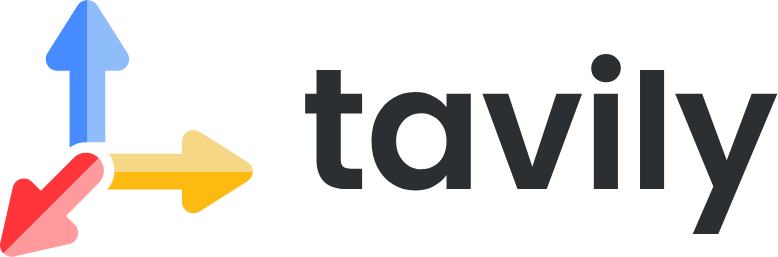



https://tavily.com/

In [30]:
if "TAVILY_API_KEY" not in os.environ:
    try:
        os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')
    except Exception as e:
        os.environ["TAVILY_API_KEY"] = getpass.getpass("Enter your TAVILY API key: ")

In [31]:
from langchain_community.tools import TavilySearchResults

tool = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
    include_raw_content=True,
    include_images=True,
)

In [32]:
tool.invoke({"query": "What is DeepSeek?"})

[{'url': 'https://ai.nd.edu/news/deepseek-explained-what-is-it-and-is-it-safe-to-use/',
  'content': 'DeepSeek refers to a new set of frontier AI models from a Chinese startup of the same name. DeepSeek has caused quite a stir in the AI world this week by demonstrating capabilities competitive with – or in some cases, better than – the latest models from OpenAI, while purportedly costing only a fraction of the money and compute power to create. DeepSeek models and their derivatives are all available for public download on Hugging Face, a prominent site for sharing AI/ML models. Did DeepSeek steal data to build its models? OpenAI recently accused DeepSeek of inappropriately using data pulled from one of its models to train DeepSeek. More About the DeepSeek Models'},
 {'url': 'https://www.techtarget.com/WhatIs/feature/DeepSeek-explained-Everything-you-need-to-know',
  'content': "DeepSeek, a Chinese AI firm, is disrupting the industry with its low-cost, open source large language models,

In [33]:
REQUEST = "What is DeepSeek?"

In [58]:
print_model_response(REQUEST, llm.invoke(REQUEST).content,"LLM - no tools equiped")

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ What is DeepSeek?                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── LLM - no tools equiped🤖 Response ───────────────────────────────────────╮
│ DeepSeek is a research project focused on using artificial intelligence (AI) and machine learning to analyze    │
│ the vast amounts of genomic data available to identify potential causes of diseases, including cancer.          │
│                                                                                                                 │
│ The project was initiated by the Gladstone Institutes, a biomedical research organization in San Francisco, in  │
│ collaboration with Google. The primary goal of DeepSeek is to use AI to analyze genomic data from cancer        │
│ patients and identify potential genetic mutations that could be driving the disease.                            │
│                                                                                                                 │
│ DeepSeek uses a combination of machine learning algorithms and large-scale genomic data analysis to identify    │
│ patterns and correlations that may not be apparent to human researchers. By analyzing genomic data from         │
│ thousands of cancer patients, the project aims to identify potential genetic mutations that could be targeted   │
│ by new treatments.                                                                                              │
│                                                                                                                 │
│ The project's name, DeepSeek, refers to the idea of "deep learning" - a type of machine learning that involves  │
│ training AI algorithms to analyze complex patterns in large datasets. The "seek" part of the name refers to the │
│ project's goal of seeking out new insights and discoveries in the field of cancer research.                     │
│                                                                                                                 │
│ DeepSeek has the potential to accelerate the discovery of new cancer treatments and improve our understanding   │
│ of the underlying biology of the disease.                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

In [35]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableConfig, chain
import datetime
today = datetime.datetime.today().strftime("%D")
prompt = ChatPromptTemplate(
    [
        ("system", f"You are a helpful assistant. The date today is {today}."),
        ("human", "{user_input}"),
        ("placeholder", "{messages}"),
    ]
)

# specifying tool_choice will force the model to call this tool.
llm_with_tools = llm.bind_tools([tool])

llm_chain = prompt | llm_with_tools


@chain
def tool_chain(user_input: str, config: RunnableConfig):
    input_ = {"user_input": user_input}
    ai_msg = llm_chain.invoke(input_, config=config)
    tool_msgs = tool.batch(ai_msg.tool_calls, config=config)
    return llm_chain.invoke({**input_, "messages": [ai_msg, *tool_msgs]}, config=config)

request = "What is DeepSeek?"
print_model_response(request, tool_chain.invoke(request).content)

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ What is DeepSeek?                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ DeepSeek is a Chinese AI firm that has been making waves in the industry with its low-cost, open-source large   │
│ language models. The company was founded in 2023 and has since released several generative AI models, including │
│ DeepSeek-V3, which has been shown to outperform models from OpenAI and other US tech giants. DeepSeek's models  │
│ are available for public download on Hugging Face, a prominent site for sharing AI/ML models. The company's     │
│ focus on open-source models has challenged the business model of US tech companies that have invested billions  │
│ in AI, and has sparked a price war in the AI model market.                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

## REACT Agent

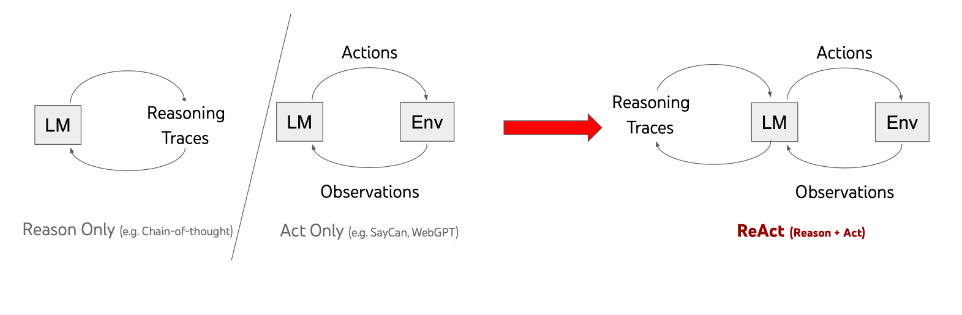

In [36]:
%pip install python-dotenv
%pip install langchain
%pip install langchain-community
%pip install langchain-core

In [37]:
%pip install -qU langchain-groq
%pip install -qU langchain_mistralai
%pip install -qU langchain-google-genai pillow
%pip install -U langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 4.0 MB/s eta 0:00:00


In [38]:
from google.colab import userdata
import getpass
import os
import re
import httpx
# Groq API Key
if "GROQ_API_KEY" not in os.environ:
    try:
        os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')
    except Exception as e:
        os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

In [39]:
%pip install -qU rich

In [40]:
from rich.console import Console
from rich.panel import Panel
from rich.text import Text
from rich.syntax import Syntax
from rich.table import Table
from typing import Any

console = Console()
def print_model_response(input_text: str, model_response: Any, model_name: str = "assistant") -> None:

    # Input Panel
    input_panel = Panel(
        Text(input_text, style="blue"), title="📝 Input Text", border_style="blue"
    )

    # Response Panel
    if isinstance(model_response, dict):
        table = Table(show_header=True, header_style="bold magenta")
        table.add_column("Key", style="cyan")
        table.add_column("Value", style="yellow")

        for key, value in model_response.items():
            table.add_row(str(key), str(value))

        response_content = table
    else:
        response_content = Text(str(model_response), style="yellow")

    response_panel = Panel(
        response_content, title=model_name+"🤖 Response", border_style="magenta"
    )

    console.print("\n" + "=" * 80 + "\n")
    console.print(input_panel)
    console.print(response_panel)
    console.print("\n" + "=" * 80 + "\n")


In [41]:
# Initialize LLM
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)

In [42]:
from typing import Literal
from langchain_core.tools import tool

# Tool to fetch weather data for specific cities
@tool
def fetch_weather(city: Literal["Cagliari", "Rome"]) -> dict:
    """
    Retrieve the current weather conditions for the specified city.
    Only supports 'Cagliari' and 'Rome'.
    """
    if city == "Cagliari":
        return {"result": "The weather in Cagliari is sunny with a light breeze."}
    elif city == "Rome":
        return {"result": "It's currently warm and clear in Rome."}
    else:
        raise ValueError("City not supported. Please choose 'Cagliari' or 'Rome'.")

In [43]:
# List of tools available for the agent
weather_tools = [fetch_weather]

# Create a reactive agent using the tools
from langgraph.prebuilt import create_react_agent

def setup_agent(llm, tools):
    """
    Initialize and return a reactive agent with the provided tools.
    """
    return create_react_agent(llm, tools=tools)

In [44]:
# Visualize the agent's workflow
from IPython.display import Image, display

def visualize_workflow(agent):
    """
    Display the agent's workflow as a Mermaid diagram.
    """
    display(Image(agent.get_graph().draw_mermaid_png()))

# Function to process and print the agent's output stream
def display_output(stream):
    """
    Print the messages from the agent's output stream in a readable format.
    """
    for step in stream:
        latest_message = step["messages"][-1]
        if isinstance(latest_message, tuple):
            print(latest_message)
        else:
            latest_message.pretty_print()

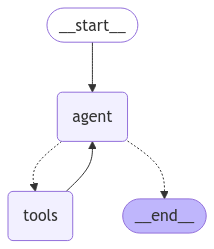

================================ Human Message =================================

What's the weather like in Sassari today?
================================== Ai Message ==================================
Tool Calls:
  fetch_weather (call_vp81)
 Call ID: call_vp81
  Args:
    city: Sassari
================================= Tool Message =================================
Name: fetch_weather

Error: 1 validation error for fetch_weather
city
  Input should be 'Cagliari' or 'Rome' [type=literal_error, input_value='Sassari', input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/literal_error
 Please fix your mistakes.
================================== Ai Message ==================================
Tool Calls:
  fetch_weather (call_jry3)
 Call ID: call_jry3
  Args:
    city: Cagliari
================================= Tool Message =================================
Name: fetch_weather

{"result": "The weather in Cagliari is sunny with a light breeze."}
===========

In [45]:
# Example input to query the weather in Cagliari
user_input = {"messages": [("user", "What's the weather like in Sassari today?")]}

# Set up the agent and visualize its workflow
weather_agent = setup_agent(llm, weather_tools)
visualize_workflow(weather_agent)

# Stream and display the agent's response
display_output(weather_agent.stream(user_input, stream_mode="values"))

In [46]:
class Agent:
    def __init__(self, system=''):
        self.system = system
        self.messages = []

        if self.system:
            self.messages.append({'role': 'system', 'content': system})

    def __call__(self, prompt):
        self.messages.append({'role': 'user', 'content': prompt})
        result = self.execute()

        if hasattr(result, 'content'):
            result_content = result.content
        else:
            result_content = result

        self.messages.append({'role': 'assistant', 'content': result_content})
        return result_content

    def execute(self, model="llama3-70b-8192", temperature=0):
        groq_messages = [{'role': msg['role'], 'content': msg['content']} for msg in self.messages]

        llm_Groq = ChatGroq(model=model, temperature=temperature)

        resultGroq = llm_Groq.invoke(groq_messages)

        return resultGroq

In [47]:
prompt = '''
You run in a loop of Thought, Action, PAUSE, Observation.
At the end of the loop you output an Answer
Use Thought to describe your thoughts about the question you have been asked.
Use Action to run one of the actions available to you - then return PAUSE.
Observation will be the result of running those actions.

Your available actions are:

calculate:
e.g. calculate: 4 * 7 / 3
Runs a calculation and returns the number - uses Python so be sure to use floating point syntax if necessary

get_cost:
e.g. get_cost: book
returns the cost of a book

wikipedia:
e.g. wikipedia: LangChain
Returns a summary from searching Wikipedia

Always look things up on Wikipedia if you have the opportunity to do so.

Example session #1:

Question: How much does a pen cost?
Thought: I should look the pen cost using get_cost
Action: get_cost: pen
PAUSE

You will be called again with this:

Observation: A pen costs $5

You then output:

Answer: A pen costs $5


Example session #2

Question: What is the capital of France?
Thought: I should look up France on Wikipedia
Action: wikipedia: France
PAUSE

You will be called again with this:

Observation: France is a country. The capital is Paris.

You then output:

Answer: The capital of France is Paris
'''.strip()

In [48]:
# 1. the calculate() function takes in a string, evaluates that string, and returns the result
def calculate(what):
    return eval(what)

# 2. the get_cost() function returns the cost for a pen, a book, and a stapler
def get_cost(thing):
    if thing in 'pen':
        return('A pen costs $5')
    elif thing in 'book':
        return('A book costs $20')
    elif thing in 'stapler':
        return('A stapler costs $10')
    else:
        return('A random thing for writing costs $12.')

# 3. the wikipedia() function uses the Wikipedia API to search for a specific query on Wikipedia
def wikipedia(q):
    response = httpx.get('https://en.wikipedia.org/w/api.php', params={
        'action': 'query',
        'list': 'search',
        'srsearch': q,
        'format': 'json'
    })
    results = response.json().get('query').get('search', [])

    if not results:
        return None
    return results[0]['snippet']

In [49]:
wikipedia('neuralnetwork')

'feedforward neural network with backpropagation: const net = new brain.<span class="searchmatch">NeuralNetwork</span>(); net.train([ { input: [0, 0], output: [0] }, { input: [0, 1], output:'

In [50]:
# dictionary that maps the function names to the functions themselves
known_actions = {
    'calculate': calculate,
    'get_cost': get_cost,
    'wikipedia': wikipedia
}

In [59]:
agent = Agent(system=prompt)
request = "How much does a book cost?"
#request = '2024 United Kingdom elections'
response = agent(request)
print_model_response(request, response)

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ How much does a book cost?                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ Thought: I should look up the cost of a book using get_cost.                                                    │
│                                                                                                                 │
│ Action: get_cost: book                                                                                          │
│ PAUSE                                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

In [60]:
# creating the next prompt that will be used as an observation and passed to the language model
next_prompt = f"Observation: {get_cost('book')}"

In [61]:
response = agent(next_prompt)
print_model_response(next_prompt, response)

================================================================================

╭───────────────────────────────────────────────── 📝 Input Text ─────────────────────────────────────────────────╮
│ Observation: A book costs $20                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── assistant🤖 Response ──────────────────────────────────────────────╮
│ Answer: A book costs $20                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

================================================================================

In [62]:
agent.messages

[{'role': 'system',
  'content': 'You run in a loop of Thought, Action, PAUSE, Observation.\nAt the end of the loop you output an Answer\nUse Thought to describe your thoughts about the question you have been asked.\nUse Action to run one of the actions available to you - then return PAUSE.\nObservation will be the result of running those actions.\n\nYour available actions are:\n\ncalculate:\ne.g. calculate: 4 * 7 / 3\nRuns a calculation and returns the number - uses Python so be sure to use floating point syntax if necessary\n\nget_cost:\ne.g. get_cost: book\nreturns the cost of a book\n\nwikipedia:\ne.g. wikipedia: LangChain\nReturns a summary from searching Wikipedia\n\nAlways look things up on Wikipedia if you have the opportunity to do so.\n\nExample session #1:\n\nQuestion: How much does a pen cost?\nThought: I should look the pen cost using get_cost\nAction: get_cost: pen\nPAUSE\n\nYou will be called again with this:\n\nObservation: A pen costs $5\n\nYou then output:\n\nAnswer: 

In [55]:
action_re = re.compile(r'^Action: (\w+): (.*)$')  # python regular expression to select Action:

In [63]:
def query(question, max_turns=5):
    i = 0
    bot = Agent(system=prompt)
    next_prompt = question
    while i < max_turns:
        i += 1
        result = bot(next_prompt)
        print(result)

         # using the regex to parse the response from the agent.
        actions = [
            action_re.match(a) for a in result.split('\n') if action_re.match(a)
        ]

        if actions:
            action, action_input = actions[0].groups()

            if action not in known_actions:
                raise Exception(f'Unknown action: {action}: {action_input}')

            print(f' -- running {action} {action_input}')
            observation = known_actions[action](action_input)

            print(f'Observation: {observation}')
            next_prompt = f'Observation: {observation}'
        else:
            return


In [57]:
question = '''I want to buy 2 books and 3 pens. How much do I have to pay?'''
query(question)

Thought: I need to find out the cost of a book and a pen, then calculate the total cost.

Action: get_cost: book
PAUSE
 -- running get_cost book
Observation: A book costs $20
Thought: Now I know the cost of a book, but I still need to know the cost of a pen.

Action: get_cost: pen
PAUSE
 -- running get_cost pen
Observation: A pen costs $5
Thought: Now I have the costs of both a book and a pen, I can calculate the total cost.

Action: calculate: 2 * 20 + 3 * 5
PAUSE
 -- running calculate 2 * 20 + 3 * 5
Observation: 55
Thought: I have the total cost now.

Answer: I have to pay $55.
